In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random 
import scipy as sp
import numpy as np
from sklearn import datasets, svm, tree, cross_validation, preprocessing, tree, metrics
import sklearn.ensemble as ske
#import tensorflow as tf
#from tensorflow.contrib import skflow

In [2]:
titanic_df = pd.read_csv("D:\Kaggle\\Titanic\\train.csv")

In [3]:
df_group = titanic_df.groupby(['Pclass','Sex']).mean()
df_group

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

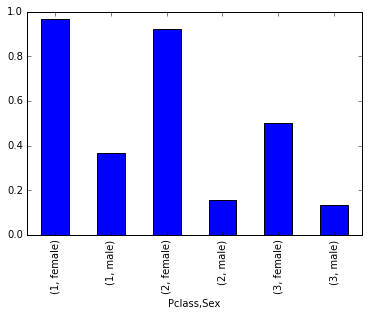

In [4]:
df_group['Survived'].plot.bar()

In [5]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
def processdf(df):
    procdf = df.copy()
    le = preprocessing.LabelEncoder()
    procdf.Sex = le.fit_transform(procdf.Sex)
    procdf.Embarked = le.fit_transform(procdf.Embarked)
    procdf = procdf.drop(['Name','Ticket','Cabin'], axis = 1)
    return procdf

In [12]:
processeddf = processdf(titanic_df)
processeddf = processeddf.dropna()

In [25]:
X = processeddf.drop(['Survived', 'PassengerId'], axis =1)
y = processeddf['Survived']

In [41]:
X_train,X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size = 0.2)

In [42]:
dt = tree.DecisionTreeClassifier(max_depth = 10)
dt.fit(X_train,y_train)
dt.score(X_test, y_test)

0.76923076923076927

In [44]:
# shuffle validator
shuffle = cross_validation.ShuffleSplit(len(X), n_iter = 20, test_size = 0.2, random_state = 0)

In [47]:
def tstclassifier(data):
    score = cross_validation.cross_val_score(dt, X, y, cv = shuffle)
    print ('Accuracy : %0.4f (+/- 0.2f)' % score.mean(), score.std())

In [48]:
tstclassifier(titanic_df)

('Accuracy : 0.7811 (+/- 0.2f)', 0.023413523136759717)


In [49]:
rf = ske.RandomForestClassifier(n_estimators = 50)
def tstclassifier(data):
    score = cross_validation.cross_val_score(rf, X, y, cv = shuffle)
    print ('Accuracy : %0.4f (+/- 0.2f)' % score.mean(), score.std())
tstclassifier(titanic_df)

('Accuracy : 0.7997 (+/- 0.2f)', 0.024652209422478782)


In [50]:
gb = ske.GradientBoostingClassifier(n_estimators = 50)
def tstclassifier(data):
    score = cross_validation.cross_val_score(gb, X, y, cv = shuffle)
    print ('Accuracy : %0.4f (+/- 0.2f)' % score.mean(), score.std())
tstclassifier(titanic_df)

('Accuracy : 0.8105 (+/- 0.2f)', 0.025397230485783049)


In [52]:
vc = ske.VotingClassifier([('dt'),('rf'),('gb')])
tstclassifier(vc)

('Accuracy : 0.8105 (+/- 0.2f)', 0.025397230485783049)
